<a href="https://colab.research.google.com/github/mqquiroz/ICH3424/blob/master/Ayudantia_5_b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ayudantía 5 - ICH3424 Ingeniería de Costas

## Analisis Espectral - Mareas (Tides)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
## Ejercicio Espectro - ICH3424 - 2020

#librerias
import numpy as np
import matplotlib.pyplot as plt
import math

import sys
sys.path.append('/content/drive/My Drive/Colab Notebooks')


data = np.loadtxt('/content/drive/My Drive/Colab Notebooks/marea.txt', skiprows=2)
eta = data[:,7] - np.mean(data[:,7])

Text(0, 0.5, 'S(f) (m$^2$ s)')

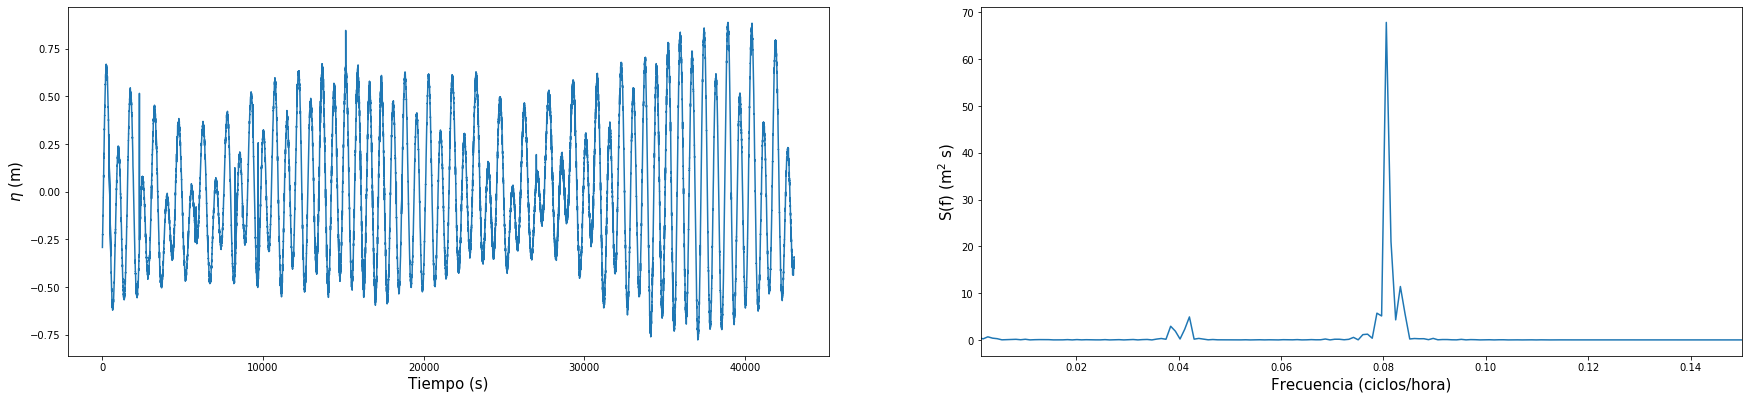

In [ ]:
# Entrega la menor potencia de 2 que es mas grande o igual al numero x. 
def nextpow2(x):
    valor = math.ceil(np.log2(abs(x)))
    return valor

# Funcion para la superficie libre
#eta = lambda t:A1*np.sin(w1*t)+A2*np.sin(w2*t) 
# vector de tiempo
#t = np.arange(0,t_total+dt,dt)

# grafica de serie de tiempo
alto = 6.425
ancho = 30
plt.figure(1,figsize = (ancho,alto))
plt.subplot(121)
#ruido_gaussiano = 2.5*np.squeeze(np.random.randn(1,len(eta(t)) )) # Agregamos un ruido gaussiano de media 0 y varianza 6.25 (o desviación estándar 2.5)
#plt.plot(t,eta(t)+ruido_gaussiano)
#plt.xlim(t[0],t[-1])
plt.plot(eta)
plt.xlabel('Tiempo (s)',fontsize=15)
plt.ylabel('$\eta$ (m)',fontsize=15)

dt = 1/60 # Horas #min

N  = len(eta) #len(t) # longitud del registro
fs = 1/dt # frec de muestreo (adquisicion)
fmax = fs/2 # frecuencia de nyquist, max frecuencia util del espectro
T0 = (N-1)*dt #t_total # longitud del registro (en tiempo)
df = 1/T0 # Discretizacion en frecuencia
fmin = df # frec. minima del espectro
NFFT=2**nextpow2(N)# Esta función es útil para optimizar las operaciones FFT, que son más eficientes cuando la longitud de secuencia es una potencia exacta de dos.
f = (fs/2)*np.linspace(0,1,int(NFFT/2+1)) # vector de frecuencias
f = f[1::] # no consideramos el valor 0
#coef = np.fft.fft(eta(t)+ruido_gaussiano,NFFT) # coeficiente de serie de fourier
coef = np.fft.fft(eta,NFFT) # coeficiente de serie de fourier
a1 = (2/N)*np.abs(coef[1:int(NFFT/2+1)])
S = (1/2)*(a1**2)/df
#an = (2/N)*np.real(coef(1:NFFT/2+1))
#bn = (2/N)*np.imag(coef(1:NFFT/2+1))
#a1 = np.sqrt(an**2+bn**2)
plt.subplot(122)
plt.plot(f,S)
plt.xlim(fmin,0.15) #fmax)
plt.xlabel('Frecuencia (ciclos/hora)',fontsize=15)
plt.ylabel('S(f) (m$^2$ s)',fontsize=15)